## Data transformation

* Logarithms:  When data such as Growth rate is exponential, log transforms will often normalize them. Log transforms are particularly appropriate if the variance increases with the mean.
* Reciprocal: If a log transform does not normalize the data, try reciprocal  (1/x) transformation. Example: Enzyme reaction rate.
* Square root: When the data contains counts such as number of insects in the garden, try square root transformation. This will convert data with Poisson distribution to a normal distribution.
* Arcsine: This transformation is useful when the data contains percentages and proportions.

For more details, please refer to http://rogeriofvieira.com/wp-content/uploads/2016/05/Data-Transformations-1.pdf

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats

%matplotlib inline

In [2]:
income = [580, 647, 134, 270, 747, 798, 345, 648, 227, 257, 369, 992, 958, 921, 39, 643, 358,\
          323, 533,  59, 290, 157, 333, 282, 634,  49, 573,  81, 244, 737, 694, 521, 553, 121,\
          729, 659,  89,  18, 213, 952]

ID     = range(0,40,1)
income_df = pd.DataFrame({'ID':ID, 'Income':income})

In [3]:
income_df.head()

,ID,Income
0,0,580
1,1,647
2,2,134
3,3,270
4,4,747


Let us understand the data in terms of its structure including dimension, type etc.

In [4]:
print(income_df.shape)

(40, 2)


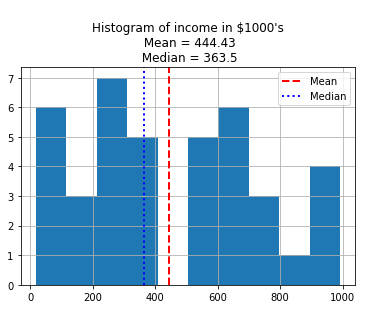

In [5]:
mean_income    = income_df['Income'].mean()
median_income  = income_df['Income'].median()

ax = income_df['Income'].hist(figsize = (6,4))
plt.axvline(mean_income, color='r', linestyle='dashed', linewidth=2, label = 'Mean')
plt.axvline(median_income , color='b', linestyle='dotted', linewidth=2, label = 'Median')
plt.title('\nHistogram of income in \$1000\'s\n' + ' Mean = ' + str(round(mean_income,2)) + '\n Median = ' + \
          str(round(median_income,2)))
max_range = np.max(income)
plt.legend()
plt.show()

We observe that the data is skewed to the right since median (363.5) < mean (444.43).
Is it because of the fact that income of some participants are higher than the rest? 

Let us test formally the normality!!

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
In our case, the income data was drawn from a normal distribution.

* Null hypothesis       : $H~0~$ : Income data is drawn from a normal distribution
* Alternative hypothesis: $H~A~$ : Income data is not drawn from a normal distribution        

In [6]:
st = stats.shapiro(income_df['Income'])
print(st)

(0.9429910778999329, 0.04365506023168564)


### Inference

Since the p value < 0.05, we reject at 5% level, we have evidence to reject the null hypothesis and conclude that the data is not drawn from a normal population.

If your data distribution is
Try this transformation method. 

| When | What |
| ----------------- | ------------------------------------------- |
| Moderately positive skewness | Square-Root               NEWX = np.sqrtSQRT(X) |
| Substantially positive skewness | Logarithmic (Log 10)   NEWX = np.log10(X)  | 
| Substantially positive skewness (with zero values) | Logarithmic (Log 10)   NEWX = np.log10(X + C) |
| Moderately negative skewness | Square-Root   NEWX = np.sqrt(K – X) |
| Substantially negative skewness | Logarithmic (Log 10)   NEWX = log10(K – X) |
 

Examples:

* Poitive skewness: Salary of persons employed in private companes in India
* Negative skewness: Grade point average of college students


In [7]:
new_income = np.sqrt(income_df['Income'])

count    40.000000
mean     19.686767
std       7.636364
min       4.242641
25%      14.948519
50%      19.065130
75%      25.509632
max      31.496031
Name: Income, dtype: float64


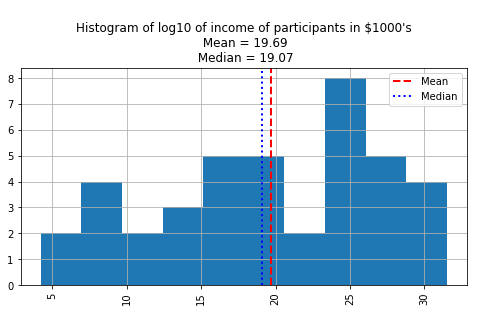

In [8]:
mean_income    = new_income.mean()
median_income  = new_income.median()
ax             = new_income.hist(figsize = (8,4), xrot = 90)
print(new_income.describe())
ax.axvline(mean_income, color = 'r', linestyle = 'dashed', linewidth = 2, label = 'Mean')
ax.axvline(median_income, color = 'b', linestyle = 'dotted', linewidth = 2, label = 'Median')
plt.title('\nHistogram of log10 of income of participants in \$1000\'s\n' + ' Mean = ' + str(round(mean_income,2)) + '\n Median = ' + \
          str(round(median_income,2)))
plt.legend()
plt.show()

In [9]:
st        = stats.shapiro(new_income)
print('\nP value is %f'%st[1])


P value is 0.102675


### Inference

Since the p value is > 0.05, at 5% level of significance, we failt to reject the null hypothesis that the income data is normally distributed.

In [10]:
gpa    = [2.6, 2.8, 3.8, 4, 4, 3.25, 3.95, 2.96, 3.2, 3.4, 4, 3.5, 4, 3.7, 3.3, 2.05, 3.85, 2.4, 3.7, 3.0, 3.1, 4.2, 2.1, 3.9, 3.0, 3.2, 3.3, 3.5, 1,  2.8]
ID     =  range(0,30,1)
gpa_df = pd.DataFrame({'ID' : ID, 'gpa' : gpa})
print(gpa_df.head())

   ID  gpa
0   0  2.6
1   1  2.8
2   2  3.8
3   3  4.0
4   4  4.0


In [11]:
len(gpa)

30

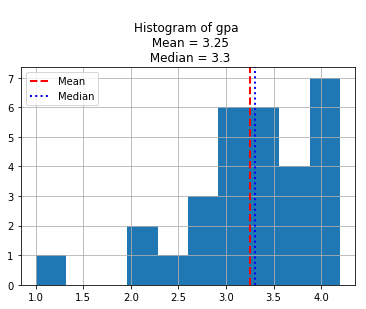

In [12]:
mean_gpa    = gpa_df['gpa'].mean()
median_gpa  = gpa_df['gpa'].median()

ax          = gpa_df['gpa'].hist(figsize = (6,4))
plt.axvline(mean_gpa, color='r', linestyle='dashed', linewidth=2, label = 'Mean')
plt.axvline(median_gpa , color='b', linestyle='dotted', linewidth=2, label = 'Median')
plt.title('\nHistogram of gpa \n' + ' Mean = ' + str(round(mean_gpa,2)) + '\n Median = ' + \
          str(round(median_gpa,2)))
max_range = np.max(gpa)
#plt.set_xticks(range(0,max_range,5))
plt.legend()
plt.show()

We observe that the data is skewed to the left since median (3.3) >  mean (3.25). Is it because of the fact that GPA score of few students are lower than the rest? 

Let us test formally the normality!!
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. In our case, the GPA  of students was drawn from a normal distribution.

* Null hypothesis :       H0 : Income data is drawn from a normal distribution
* Alternative hypothesis: HA : Income data is not drawn from a normal distribution 

In [13]:
st = stats.shapiro(gpa_df['gpa'])
print("\nP Value is %f" %st[1])


P Value is 0.013722


Since the p value < 0.05, we reject at 5% level, we have evidence to reject the null hypothesis and conclude that the data is not drawn from a normal population.

Since the data is moderately negatively skewed, we will try reflected transformation using Square-Root method. 

In [14]:
k = 5
new_gpa = np.sqrt(k - gpa_df['gpa'])

count    30.000000
mean      1.297603
std       0.257763
min       0.894427
25%       1.078147
50%       1.303840
75%       1.424768
max       2.000000
Name: gpa, dtype: float64


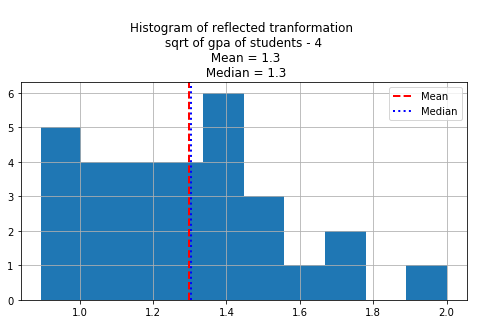

In [15]:
mean_gpa    = new_gpa.mean()
median_gpa  = new_gpa.median()
ax          = new_gpa.hist(figsize = (8,4))
print(new_gpa.describe())
ax.axvline(mean_gpa, color='r', linestyle='dashed', linewidth=2, label = 'Mean')
ax.axvline(median_gpa, color='b', linestyle='dotted', linewidth=2, label = 'Median')
plt.title('\nHistogram of reflected tranformation \n sqrt of gpa of students - 4 \n' + ' Mean = ' + str(round(mean_gpa,2)) + '\n Median = ' + \
          str(round(median_gpa,2)))
#ax.set_xticks([2.0,2.4,2.6,2.8, 3.0])
plt.legend()
plt.show()

In [16]:
st = stats.shapiro(new_gpa)
print("\nP Value is %f" %st[1])


P Value is 0.214563


### Inference

Since the p value is > 0.05, at 5% level of significance, we fail to reject the null hypothesis that the income data is normally distributed.

### END